
In order to successfully complete this assignment we recommend that you participate both individually and in groups during class. **Turn in your assignment using D2L no later than 11:59pm on the day of class.** Grading is based on correctness and completion.

# In-Class Assignment: Singular Value Decomposition

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/1024px-Singular-Value-Decomposition.svg.png" width='40%'>

From: https://en.wikipedia.org/wiki/Singular_value_decomposition

### Agenda for today's class (80 minutes)


1. [(20 minutes) Pre-Class Assignment Review](#Class_Assignment_Review)
2. [(50 minutes) Using SVD for dimensionality reduction](#Using_SVD_for_dimensionality_reduction)
3. [(10 minutes) Singular Value Decomposition Theory (Optional)](#SVD_theory)


----
<a name="Pre-Class_Assignment_Review"></a>
# 1. Pre-Class Assignment Review


<img src="https://intoli.com/blog/pca-and-svd/img/svd-matrices.png">

----
<a name="Using_SVD_for_dimensionality_reduction"></a>
# 2. Using SVD for dimensionality reduction

<img src="https://i1.wp.com/myfraternitylife.org/wp-content/uploads/2018/10/sparty.jpg?fit=2048%2C1365&ssl=1" width="50%">



The following code reads an image file from a website, discards the red and blue channels and pulls out the 'green' component of the image in a `numpy` matrix called `A`. We will treat this numpy array as a grayscale image. 

In [1]:
# Here are some libraries you may need to use
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import math
sym.init_printing()

In [2]:
from urllib.request import urlopen, urlretrieve
import imageio


url = 'https://i1.wp.com/myfraternitylife.org/wp-content/uploads/2018/10/sparty.jpg?fit=2048%2C1365&ssl=1'
file = '.flags.jpeg'

urlretrieve(url, file);

A = imageio.imread(file)
print(A.shape)

(1365, 2048, 3)


In [3]:
#Image is way too big. Make it smaller

from PIL import Image

A = np.array(Image.fromarray(A).resize((204,136)))

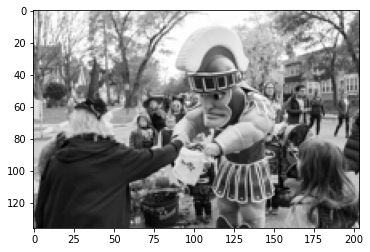

In [4]:
A = np.matrix(A[:,:,1])
plt.imshow(A, cmap='gray');

## Step 1: Singular Value Decomposition
The following code does a singular value decomposition (SVD) of the image matrix $A$. 

$$A = U\Sigma V^\top$$

**Note:** The following cell may take a while to run.......hopefully you should only need to do this once...

In [5]:
A.shape

In [6]:
#%%time


U, f, Vt = np.linalg.svd(A)

In [7]:
U = np.matrix(U)
U.shape

In [11]:
e.shape


In [12]:
e = f * np.identity(136)
print(e)

[[22087.01036251     0.             0.         ...     0.
      0.             0.        ]
 [    0.          3601.61479604     0.         ...     0.
      0.             0.        ]
 [    0.             0.          3108.19709322 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...    32.31587975
      0.             0.        ]
 [    0.             0.             0.         ...     0.
     29.26267292     0.        ]
 [    0.             0.             0.         ...     0.
      0.            26.53810514]]


In [13]:
zero = np.zeros((136,68))
e = np.concatenate((e,zero), axis=1)
print(e)

[[22087.01036251     0.             0.         ...     0.
      0.             0.        ]
 [    0.          3601.61479604     0.         ...     0.
      0.             0.        ]
 [    0.             0.          3108.19709322 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]]


In [14]:
Vt = np.matrix(Vt)
Vt.shape

**<font color=red>QUESTION</font>** Remember that the numpy ```svd``` function returns $U$, a vector of singular values ($\sigma$) and the transpose of $V$.  Verify the success of the decomposition by regenerating $A$ from the calculated components and comparing the regenerated $A$ to the original image $A$ using the numpy ```allclose``` function.

In [15]:
#Put your answer here
new_im = U*e*Vt

In [16]:
#This should be true
np.allclose(A,new_im)

True

**<font color=red>Question:</font>** We use the `np.allclose` function instead of a simple python equality (==) to account for small errors in calculation. Where do these errors come from?  

These are all rounding error.

## Step 2: Removing small singular values.

We are now going to make a new image but only keep the $N$ biggest singular values while setting all of the rest to zero. First we define a new vector (```s```) consisting of the first $N=10$ singular values:

In [106]:
#Put your answer here
s = f[0:10]
print(s)

[22087.01036251  3601.61479604  3108.19709322  2688.3064753
  2399.00793502  2162.02718864  1812.00006234  1734.79151311
  1494.67310992  1453.53412725]


Now let's remake the $\Sigma$ matrix using $s$. We will call this new $\Sigma$ matrix ```S``` (capital ```S```). We will use ```S``` to generate a new image and show the rsults:

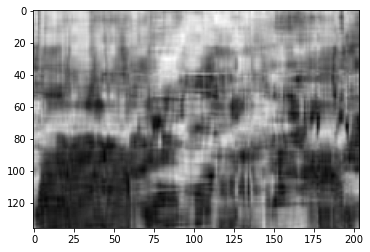

In [107]:
# Sigma matrix should be the same size as the original A matrix with mostly zero values
S = np.zeros(A.shape)

# The upper left diagonal of the Sigma matrix should be the singular values
S[:len(s), :len(s)] = np.diag(s)

#Compressed image
I = U*S*Vt

plt.imshow(I, cmap='gray')

We can plot the difference between the original image and the image generated with only 10 singular values. This represents the error in the image at each pixel.

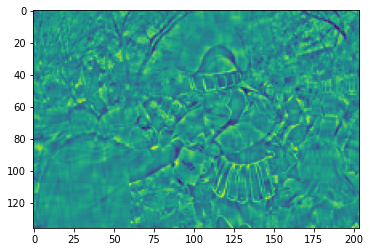

In [108]:
plt.imshow(A-I)

The following calculates the root mean squared error for the image

In [109]:
rmse = np.sqrt(((np.array(A)  - np.array(I)) ** 2).mean())
rmse

Although 10 values seems like a good number, you can really see some distortion in the second image.  We want to find a better number for $N$. The following code makes a plot of the singular values to get an idea of the scale. Note that this plot has a y-axis that is logarithmic. 

Text(0, 0.5, 'singular value')

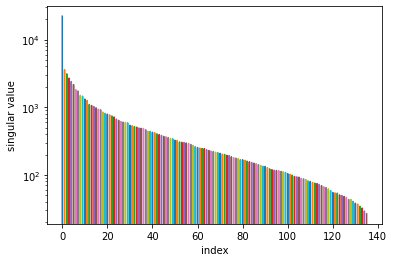

In [110]:
plt.plot(e)
plt.gca().set_yscale('log')
plt.xlabel('index')
plt.ylabel('singular value')


**<font color=red>Question:</font>** Next, Modify the code in **Step 2** to pick a different value for $N$ such that it is hard to tell the difference between the new image and the original image. Try to make this $N$ as small as possible. Describe The procedure you used to come up with a new value for $N$.  

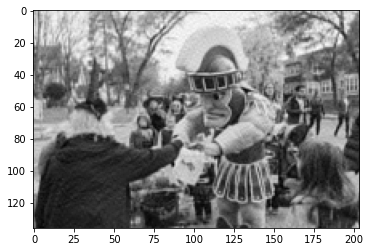

In [111]:
s = f[0:60]
# Sigma matrix should be the same size as the original A matrix with mostly zero values
S = np.zeros(A.shape)

# The upper left diagonal of the Sigma matrix should be the singular values
S[:len(s), :len(s)] = np.diag(s)

#Compressed image
I = U*S*Vt

plt.imshow(I, cmap='gray')

In [112]:
rmse = np.sqrt(((np.array(A)  - np.array(I)) ** 2).mean())
rmse

I would say that the new `N` would be 60 because root value also becomes very less.

## Step 3: Compression

The reason we set a bunch of singular values to zero is to save memory.  However, so far we haven't saved anything.  We can make an estimate of storage of the original image $A$ by multiplying the number of the rows by the number of columns (i.e this is how many numbers we need to store to recreate the image):

In [113]:
A.shape[0]*A.shape[1]

Our new SVD representation requires even more space to store the same information!

In [114]:
U.shape[0]*U.shape[1] + len(s) + Vt.shape[0] * Vt.shape[1]

However, the trick is that singular values of zero  don't add anything to the calculation and the zeros propagate  though the math.  We can now make a new set of matrices, ```U1```,  ```S1``` and ```V1``` which are much smaller than ```U```, ```e```, ```Vt``` because we can remove the rows and columns that turn out to be zero in the math. 

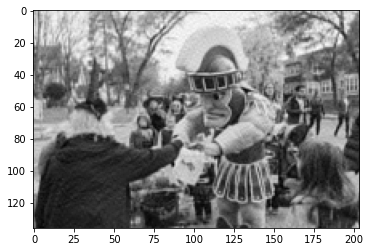

In [115]:
U1 = np.matrix(U[:,:len(s)])
S1 = np.diag(s)
Vt1 = np.matrix(Vt[:len(s),:])

#Compressed image
I = U1*S1*Vt1

plt.imshow(I, cmap='gray')

**<font color=red>Question:</font>** How much space is required to store ```U1```, ```s```, and ```Vt1```? 

In [116]:
## Put your answer here
U1.shape[0]*U1.shape[1] + len(s) + Vt1.shape[0] * Vt1.shape[1]

**<font color=red>Question:</font>** If everything from above is correct, then we demonstrated that converting an image to a reduced SVD format will save in memory storage. Describe at least two disadvantages of using SVD for image compression.

1.It is not a very good block-based transformation technique, and using SVD on the whole image requires lots of memory.

2.It is very computation intensive. The DCT has some very fast implementations.

----
<a name="SVD_theory"></a>

# 3. Singular Value Decomposition Theory (Optional)

In the pre-class assignement, we computed the matrices $U$ and $V$ from the eigendecomposition of $AA^\top$ and $A^\top A$, and the matrix $\Sigma$ comes from the eigenvalues of $A^\top A$ or $AA^\top$. Here, we would like to explain why we can do this. Assume that $n\leq m$.

* We have $AA^\top = UD_1U^\top$ because $AA^\top$ is symmetric positive semidefinite. All diagonal elements in $D_1$ are nonnegative. Let $U=[u_1,\dots, u_m]$
* We have $A^\top A = VD_2V^\top$ because $A^\top A$ is symmetric positive semidefinite. All diagonal elements in $D_2$ are nonnegative. Note the size of $D_1$ may not be the same. $D_1$ has size $m\times m$, and $D_2$ has size $n\times n$. Let $V=[v_1,\dots, v_m]$
* Assume that $v_1$ is the unit eigenvector of $A^\top A$ corresponding to the eigenvalue $\sigma_1^2$. That is 
$$A^\top A v_1 = \sigma^2 v_1$$
Multiply $A$ to the left and we have 
$$AA^\top A v_1 = \sigma^2 Av_1$$
That is $Av_1$ is an eigenvector of $AA^\top$ corresponding to $\sigma_1^2$.
* WLOG, we assume that the diagonal elements of $D_1$ and $D_2$ are in decreasing order. That is $\sigma_1^2\geq \sigma_2^2\geq \dots \geq \sigma_r^2$, where $r$ is the rank of the matrix. $r\leq n\leq m$
* We measure the length of $Av_1$. 
$$(Av_1)\cdot (Av_1) = v_1 A^\top A v_1 = v_1 \cdot \sigma_1^2 v_1 = \sigma_1^2$$
That is $\|Av_1\|=\sigma_1$, and ${1\over\sigma_1}Av_1$ is an unit eigenvector of $AA^\top$ corresponding to $\sigma_1^2$.
* That is ${1\over \sigma_1}Av_1=\pm u_1$. Since we can change the sign for $u$, we let $u_1={1\over \sigma_1}Av_1$.
* Doing this from $\sigma_1$ to $\sigma_r$, we have 
$$[u_1, \cdots, u_r] = A [v_1,\cdots,v_r] \Sigma_{r\times r}^{-1}$$
where $\Sigma_{r\times r}$ is the diagonal matrix with elements $\sigma_1,\dots,\sigma_r$.
Therefore, we have 
$$[u_1, \cdots, u_r] \Sigma_{r\times r}= A [v_1,\cdots,v_r]$$

* By completing the orthogonal matrix, we have the full version. 
$$[u_1, \cdots, u_r,\cdots,u_m] \Sigma_{m\times n}= A [v_1,\cdots,v_r, \cdots, v_m]$$
That is $$A = U \Sigma V^\top$$
* Since $\Sigma$ only has $r$ nonzero elements, we have the simplified version 
That is $$A = U_{m\times r} \Sigma_{r\times r} (V_{n\times r})^\top$$



-----
### Congratulations, we're done!
